In [1]:
from time import sleep
from dask import delayed

In [2]:
data = [1,2,3,4,5,6,7,8]

In [6]:
def inc(x):
    sleep(1)
    return x+1

In [7]:
# Without parallel computing
%%time
results = []
for x in data:
    y = inc(x)
    results.append(y)
total = sum(results)

CPU times: user 5.67 ms, sys: 222 µs, total: 5.9 ms
Wall time: 8.01 s


In [8]:
total

44

In [36]:
%%time
# With parallel computing
results = []
for x in data:
    y = delayed(inc)(x)
    results.append(y)
total = delayed(sum)(results)

CPU times: user 2 ms, sys: 3.87 ms, total: 5.86 ms
Wall time: 4.26 ms


In [15]:
total.compute()

44

### Dask Dataframe

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [115]:
import dask.dataframe as dd

In [78]:
df = dd.read_csv('novel-corona-virus-2019-dataset/2019_nCoV_data.csv')

In [79]:
df.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [80]:
df = df.drop("Sno", axis=1)

In [81]:
df = df.drop("Last Update", axis=1)

In [82]:
df.head()

,Date,Province/State,Country,Confirmed,Deaths,Recovered
0,01/22/2020 12:00:00,Anhui,China,1.0,0.0,0.0
1,01/22/2020 12:00:00,Beijing,China,14.0,0.0,0.0
2,01/22/2020 12:00:00,Chongqing,China,6.0,0.0,0.0
3,01/22/2020 12:00:00,Fujian,China,1.0,0.0,0.0
4,01/22/2020 12:00:00,Gansu,China,0.0,0.0,0.0


In [83]:
df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 6 entries, Date to Recovered
dtypes: object(3), float64(3)

In [84]:
#listing all the countries where the virus has spread to
country_list=list(df['Country'].unique())
print(country_list)
print(len(country_list))

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium', 'Others']
33


In [85]:
#converting 'Date' column to datetime object
df['Date'] = dd.to_datetime(df['Date'])
#extracting dates from timestamps
df['Date_date']=df['Date'].apply(lambda x:x.date())

/home/nagaraj/anaconda3/lib/python3.7/site-packages/dask/dataframe/core.py:2957: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('Date', 'object'))

  warnings.warn(meta_warning(meta))


In [86]:
df.head() # After changing the date format

,Date,Province/State,Country,Confirmed,Deaths,Recovered,Date_date
0,2020-01-22 12:00:00,Anhui,China,1.0,0.0,0.0,2020-01-22
1,2020-01-22 12:00:00,Beijing,China,14.0,0.0,0.0,2020-01-22
2,2020-01-22 12:00:00,Chongqing,China,6.0,0.0,0.0,2020-01-22
3,2020-01-22 12:00:00,Fujian,China,1.0,0.0,0.0,2020-01-22
4,2020-01-22 12:00:00,Gansu,China,0.0,0.0,0.0,2020-01-22


In [87]:
#getting the total number of confirmed cases for each country
df_country=df.groupby(['Country']).max()

In [92]:
df_country.head(15)

,Date,Confirmed,Deaths,Recovered,Date_date
Country,,,,,
Australia,2020-02-12 22:00:00,5.0,0.0,2.0,2020-02-12
Belgium,2020-02-12 22:00:00,1.0,0.0,0.0,2020-02-12
Brazil,2020-01-23 12:00:00,0.0,0.0,0.0,2020-01-23
Cambodia,2020-02-12 22:00:00,1.0,0.0,1.0,2020-02-12
Canada,2020-02-12 22:00:00,4.0,0.0,1.0,2020-02-12
China,2020-01-22 12:00:00,444.0,0.0,0.0,2020-01-22
Finland,2020-02-12 22:00:00,1.0,0.0,1.0,2020-02-12
France,2020-02-12 22:00:00,11.0,0.0,2.0,2020-02-12
Germany,2020-02-12 22:00:00,16.0,0.0,0.0,2020-02-12


In [93]:
print(df_country[['Confirmed','Deaths','Recovered']].head(15))

             Confirmed  Deaths  Recovered
Country                                  
Australia          5.0     0.0        2.0
Belgium            1.0     0.0        0.0
Brazil             0.0     0.0        0.0
Cambodia           1.0     0.0        1.0
Canada             4.0     0.0        1.0
China            444.0     0.0        0.0
Finland            1.0     0.0        1.0
France            11.0     0.0        2.0
Germany           16.0     0.0        0.0
Hong Kong         50.0     1.0        1.0
India              3.0     0.0        0.0
Italy              3.0     0.0        0.0
Ivory Coast        0.0     0.0        0.0
Japan             45.0     0.0        9.0
Macau             10.0     0.0        2.0


In [100]:
df_by_date=df.groupby(['Date_date']).sum().reset_index(drop=None)

In [113]:
df_by_date = df_by_date.compute()

In [105]:
#df_by_date['Date_date']

Dask Series Structure:
npartitions=1
    object
       ...
Name: Date_date, dtype: object
Dask Name: getitem, 15 tasks

Text(0.5, 0, 'Dates')

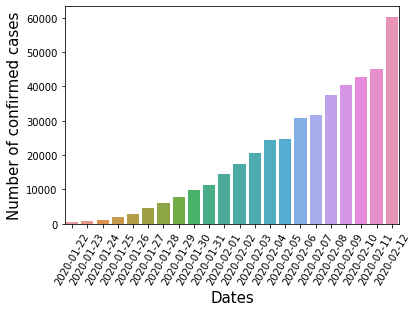

In [114]:
#plotting a bar chart of confirmed cases over time
sns.axes_style("whitegrid")
sns.barplot(data = df_by_date, x ='Date_date', y ='Confirmed')
plt.xticks(rotation=60)
plt.ylabel('Number of confirmed cases',fontsize=15)
plt.xlabel('Dates',fontsize=15)